# Load Digits Data

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

In [3]:
digits['target']

array([0, 1, 2, ..., 8, 9, 8])

In [4]:
digits['data']

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
digits['data'].min(), digits['data'].max()

(0.0, 16.0)

In [6]:
digits['data'].shape

(1797, 64)

In [7]:
digits['target'].shape

(1797,)

## Displaying Digits

In [8]:
def display_img(img, target, ax, vmin=0, vmax=16):
    img = img.reshape((8, 8))
    
    ax.imshow(img, cmap='gray', vmin=vmin, vmax=vmax)
    ax.set_title(f'Digit: {str(target)}')
    ax.grid(False)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


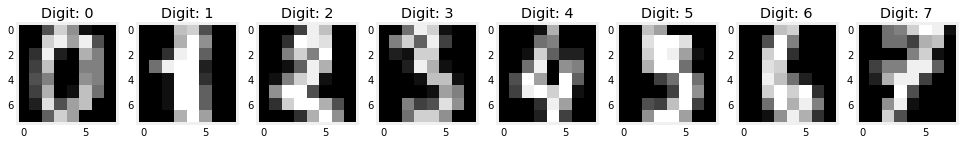

In [9]:
fig, axs = plt.subplots(1, 8, figsize=(15, 10))

for i in range(8):
    display_img(digits['data'][i], digits['target'][i], axs[i])

fig.show()

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


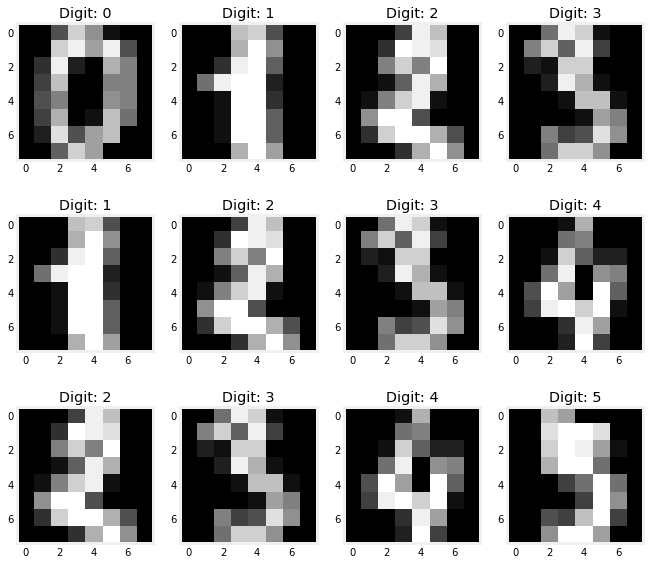

In [10]:
fig, axs = plt.subplots(3, 4, figsize=(10, 10))

for i in range(3):
    for j in range(4):
        display_img(digits['data'][i+j], digits['target'][i+j], axs[i][j])

fig.show()

## Digits Train/Test Split

In [11]:
from sklearn.model_selection import train_test_split

x, y = digits['data'], digits['target']

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [12]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
clf = LogisticRegression()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

clf.fit(x_train_scaled, y_train)

y_train_pred = clf.predict(x_train_scaled)
y_test_pred = clf.predict(x_test_scaled)


from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score

print(
    'Digits test accuracy score: {:.1%} [train score: {:.1%}]'.format(
        accuracy_score(y_test, y_test_pred),
        accuracy_score(y_train, y_train_pred)
    )
    
)

Digits test accuracy score: 98.2% [train score: 99.9%]


## Digits KNN

In [14]:
import time

def apply_and_time(fn, *args):
    t1 = time.time()
    fn_return = fn(*args)
    t2 = time.time()
    print(f'Time taken to fit {t2 - t1:.2f}s')
    return fn_return

In [15]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

apply_and_time(clf.fit, x_train, y_train)

y_test_pred = apply_and_time(clf.predict, x_test)

Time taken to fit 0.00s
Time taken to fit 0.09s


In [16]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=11, metric='manhattan')

clf.fit(x_train, y_train)

y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [17]:
from sklearn.metrics import accuracy_score

print(
    'Digits test accuracy score: {:.1%} [train score: {:.1%}]'.format(
        accuracy_score(y_test, y_test_pred),
        accuracy_score(y_train, y_train_pred)
    )
    
)

Digits test accuracy score: 97.3% [train score: 98.1%]


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


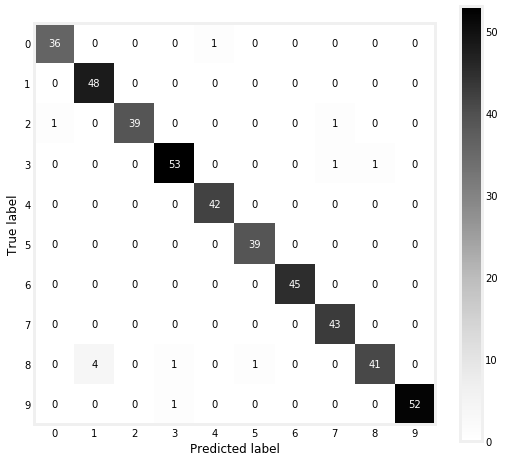

In [18]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

plot_confusion_matrix(clf, x_test, y_test, cmap='Greys', ax=ax)
ax.grid(False)
ax.set_label('MNIST Confusion Matrix')

fig.show()

## K 

In [19]:
x_train.shape[0]

1347

In [20]:
from sklearn.preprocessing import Binarizer
from sklearn.neighbors import KNeighborsClassifier

scaler = Binarizer()

x_train_high_contrast = scaler.fit_transform(x_train)
x_test_high_contrast = scaler.transform(x_test)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


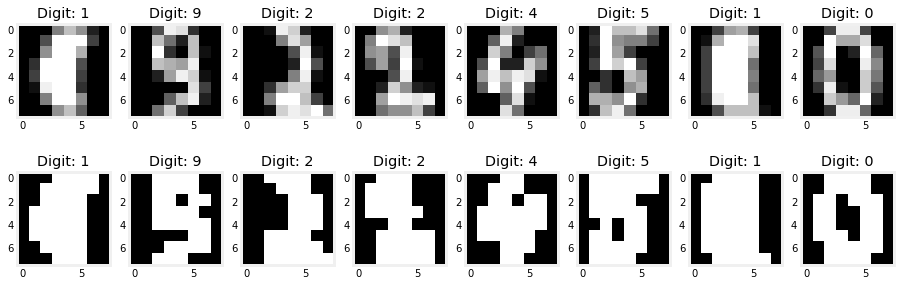

In [21]:
import random 

fig, axs = plt.subplots(2, 8, figsize=(14, 5))

for i in range(8):
    
    rand = random.choice(range(y_train.shape[0]))

    img_orig = x_train[rand]
    img_comp = x_train_high_contrast[rand]
    
    display_img(img_orig, y_train[rand], axs[0][i], vmin=None, vmax=None)
    display_img(img_comp, y_train[rand], axs[1][i], vmin=None, vmax=None)


fig.show()

In [22]:
scores = {}

for k in range(1, 1301, 25):
    
    clf = KNeighborsClassifier(n_neighbors=k, metric='cosine', p=3)
    clf.fit(x_train_high_contrast, y_train)
    y_test_pred = clf.predict(x_test_high_contrast)
    scores[k] = accuracy_score(y_test, y_test_pred)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


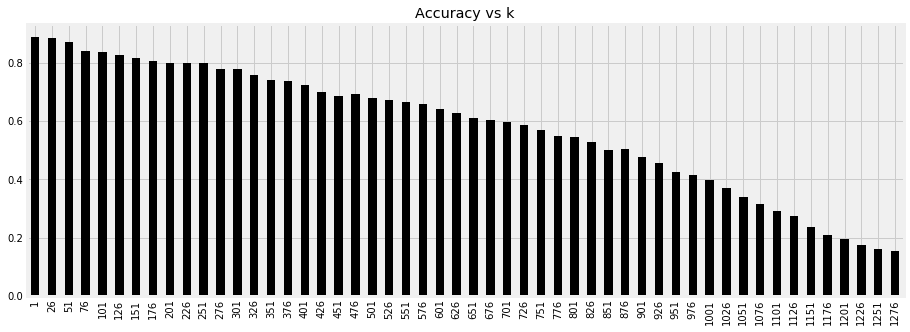

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(14, 5))

pd.Series(scores).plot(
    title='Accuracy vs k',
    kind='bar',
    color='k',
    ax=ax
)

fig.show()

In [24]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

parameters = {'metric':('manhattan','euclidean', 'cosine'), 'n_neighbors': range(1, 21)}

knn = KNeighborsClassifier()
clf = GridSearchCV(knn, param_grid=parameters, scoring='accuracy', cv=5)

clf.fit(x_train, y_train)

print('best_params:', clf.best_params_)
print('best_score:', clf.best_score_)

best_params: {'metric': 'euclidean', 'n_neighbors': 1}
best_score: 0.9851521409885722


In [25]:
y_test_pred = clf.predict(x_test)
accuracy_score(y_test, y_test_pred)

0.9866666666666667

In [26]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Binarizer
from sklearn.neighbors import KNeighborsClassifier

scaler = Binarizer()
clf = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

clf.fit(x_train_scaled, y_train)

y_train_pred = clf.predict(x_train_scaled)
y_test_pred = clf.predict(x_test_scaled)

from sklearn.metrics import accuracy_score

print(
    'Digits test accuracy score: {:.1%} [train score: {:.1%}]'.format(
        accuracy_score(y_test, y_test_pred),
        accuracy_score(y_train, y_train_pred)
    )
    
)


Digits test accuracy score: 89.3% [train score: 94.4%]


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


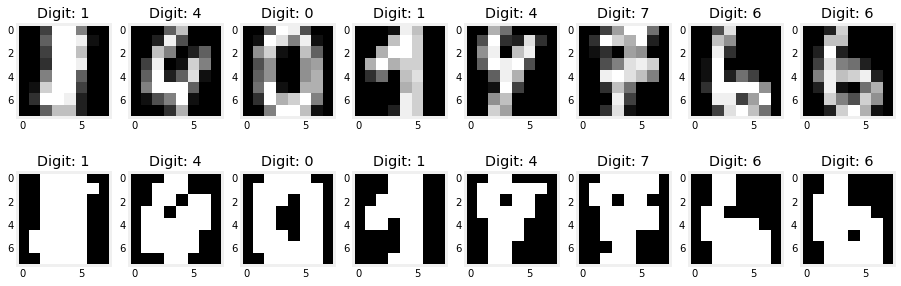

In [27]:
import random 

fig, axs = plt.subplots(2, 8, figsize=(14, 5))

for i in range(8):
    
    rand = random.choice(range(y_train.shape[0]))

    img_orig = x_train[rand]
    img_comp = x_train_scaled[rand]
    
    display_img(img_orig, y_train[rand], axs[0][i], vmin=None, vmax=None)
    display_img(img_comp, y_train[rand], axs[1][i], vmin=None, vmax=None)


fig.show()

In [28]:
from scipy import ndimage

k_sharpen = [[0,-1,0], [-1,5,-1], [0,-1,0]]
k_smooth = [[0.1,0.1,0.1],[0.1,0.2,0.1],[0.1,0.1,0.1]]
k_wtf = [[1,-1],[-1,0]]
k = k_wtf

x_train_conv = ndimage.convolve(x_train.reshape((x_train.shape[0], 8, 8)), [k], mode='reflect', cval=0.0) 
x_test_conv = ndimage.convolve(x_test.reshape((x_test.shape[0], 8, 8)), [k], mode='reflect', cval=0.0)

x_train_conv = x_train_conv.reshape(x_train_conv.shape[0], x_train_conv.shape[1]*x_train_conv.shape[2]) 
x_test_conv = x_test_conv.reshape(x_test_conv.shape[0], x_test_conv.shape[1]*x_test_conv.shape[2]) 

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


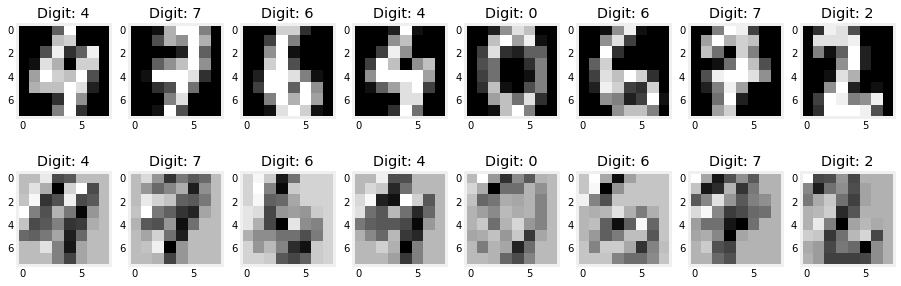

In [29]:
import random 

fig, axs = plt.subplots(2, 8, figsize=(14, 5))

for i in range(8):
    
    rand = random.choice(range(y_train.shape[0]))

    img_orig = x_train[rand]
    img_conv = x_train_conv[rand]
    
    display_img(img_orig, y_train[rand], axs[0][i], vmin=None, vmax=None)
    display_img(img_conv, y_train[rand], axs[1][i], vmin=None, vmax=None)


fig.show()

In [30]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

clf.fit(x_train_conv, y_train)
y_train_pred = clf.predict(x_train_conv)
y_test_pred = clf.predict(x_test_conv)


from sklearn.metrics import accuracy_score

print(
    'Digits test accuracy score: {:.1%} [train score: {:.1%}]'.format(
        accuracy_score(y_test, y_test_pred),
        accuracy_score(y_train, y_train_pred)
    )
    
)


Digits test accuracy score: 98.9% [train score: 99.0%]


In [31]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

clf.fit(x_train, y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)


from sklearn.metrics import accuracy_score

print(
    'Digits test accuracy score: {:.1%} [train score: {:.1%}]'.format(
        accuracy_score(y_test, y_test_pred),
        accuracy_score(y_train, y_train_pred)
    )
    
)


Digits test accuracy score: 99.1% [train score: 99.3%]


## Inverted Image

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

clf.fit(x_train, y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)


print(
    'Digits test accuracy score: {:.1%} [train score: {:.1%}]'.format(
        accuracy_score(y_test, y_test_pred),
        accuracy_score(y_train, y_train_pred)
    )
    
)


Digits test accuracy score: 99.1% [train score: 99.3%]


In [33]:
x_train_inv = x_train.max() - x_train

In [34]:
x_test_inv = x_test.max() - x_test

In [35]:
x_train_inv

array([[16., 16., 15., ...,  6., 16., 16.],
       [16., 13.,  2., ..., 16., 16., 16.],
       [16., 16., 13., ..., 16., 16., 16.],
       ...,
       [16., 16., 16., ..., 16., 16., 16.],
       [16., 16.,  7., ...,  4.,  5., 16.],
       [16., 14.,  3., ...,  0.,  0., 13.]])

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


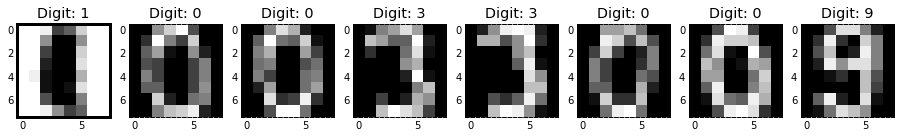

In [39]:
fig, axs = plt.subplots(1, 8, figsize=(14, 5))


img_orig = x_train[rand]
img_inv = x_train_inv[rand]

display_img(img_inv, y_train[0], axs[0], vmin=None, vmax=None)
    

_, kneighbors_index_inv = clf.kneighbors(
    [x_train_inv[0]], 
    n_neighbors=7, 
    return_distance=True
)


for i, neighbor_index in enumerate(kneighbors_index_inv[0], 1):
    
    display_img(
        x_train[neighbor_index], 
        y_train[neighbor_index], 
        axs[i]
    )
    
# Styling


for i in range(n_neighbors+1):
    
    for spline in axs[i].spines.values():
        linestyle = '-' if i == 0 else '--'
        linewidth = 3 if i == 0 else 1
        
        spline.set_linestyle(linestyle)
        spline.set_linewidth(linewidth)
        spline.set_color('k')

fig.show()

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:70: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


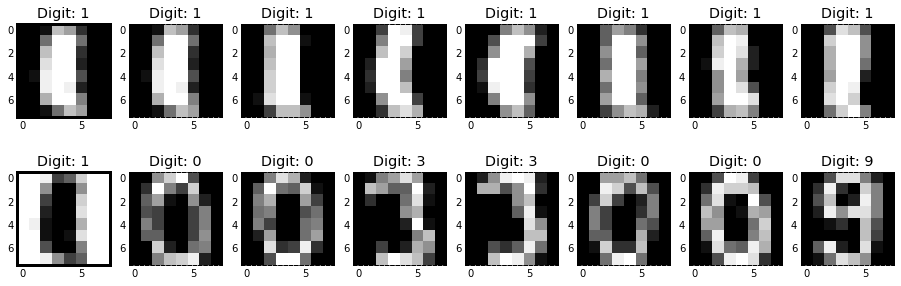

In [38]:
import random 

fig, axs = plt.subplots(2, 8, figsize=(14, 5))

rand = 0 # random.choice(range(y_train.shape[0]))

img_orig = x_train[rand]
img_inv = x_train_inv[rand]

display_img(img_orig, y_train[rand], axs[0][0], vmin=None, vmax=None)
display_img(img_inv, y_train[rand], axs[1][0], vmin=None, vmax=None)

n_neighbors = 7

_, kneighbors_index_orig = clf.kneighbors(
    [x_train[rand]], 
    n_neighbors=n_neighbors, 
    return_distance=True
)


for i, neighbor_index in enumerate(kneighbors_index_orig[0], 1):

    display_img(
        x_train[neighbor_index], 
        y_train[neighbor_index], 
        axs[0][i]
    )
    
    
_, kneighbors_index_inv = clf.kneighbors(
    [x_train_inv[rand]], 
    n_neighbors=n_neighbors, 
    return_distance=True
)


for i, neighbor_index in enumerate(kneighbors_index_inv[0], 1):
    
    display_img(
        x_train[neighbor_index], 
        y_train[neighbor_index], 
        axs[1][i]
    )
    
# Styling


for i in range(n_neighbors+1):
    
    for spline in axs[0][i].spines.values():
        linestyle = '-' if i == 0 else '--'
        linewidth = 3 if i == 0 else 1
        
        spline.set_linestyle(linestyle)
        spline.set_linewidth(linewidth)
        spline.set_color('k')
        
    for spline in axs[1][i].spines.values():
        linestyle = '-' if i == 0 else '--'
        linewidth = 3 if i == 0 else 1
        
        spline.set_linestyle(linestyle)
        spline.set_linewidth(linewidth)
        spline.set_color('k')
    
    


fig.show()

## Custom Distance

In [40]:
from sklearn.metrics.pairwise import euclidean_distances

def contrast_distance(x1, x2):
    _x1, _x2 = np.abs(8 - x1), np.abs(8 - x2)
    d = euclidean_distances([_x1], [_x2])
    return d[0][0]

contrast_distance(x_train[0], x_train[1])

28.930952282978865

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3, metric=contrast_distance)

clf.fit(x_train, y_train)

y_test_pred = clf.predict(x_test)
y_test_inv_pred = clf.predict(x_test_inv)


print(
    'Digits test accuracy score: {:.1%} [invertd test score: {:.1%}]'.format(
        accuracy_score(y_test, y_test_pred),
        accuracy_score(y_test, y_test_inv_pred)
    )
    
)


Digits test accuracy score: 89.6% [invertd test score: 89.6%]


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:70: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


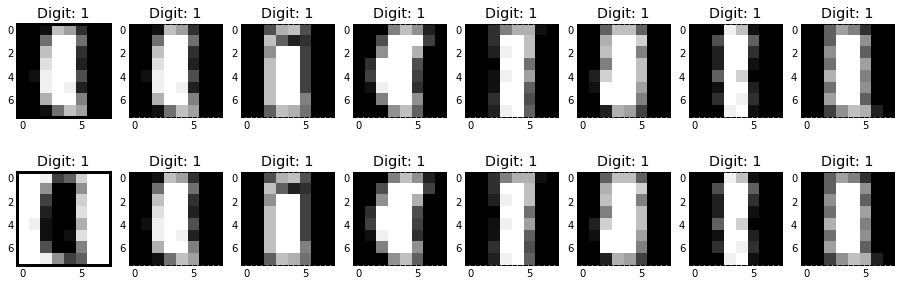

In [42]:
import random 

fig, axs = plt.subplots(2, 8, figsize=(14, 5))

rand = 0 # random.choice(range(y_train.shape[0]))

img_orig = x_train[rand]
img_inv = x_train_inv[rand]

display_img(img_orig, y_train[rand], axs[0][0], vmin=None, vmax=None)
display_img(img_inv, y_train[rand], axs[1][0], vmin=None, vmax=None)

n_neighbors = 7

_, kneighbors_index_orig = clf.kneighbors(
    [x_train[rand]], 
    n_neighbors=n_neighbors, 
    return_distance=True
)


for i, neighbor_index in enumerate(kneighbors_index_orig[0], 1):

    display_img(
        x_train[neighbor_index], 
        y_train[neighbor_index], 
        axs[0][i]
    )
    
    
_, kneighbors_index_inv = clf.kneighbors(
    [x_train_inv[rand]], 
    n_neighbors=n_neighbors, 
    return_distance=True
)


for i, neighbor_index in enumerate(kneighbors_index_inv[0], 1):
    
    display_img(
        x_train[neighbor_index], 
        y_train[neighbor_index], 
        axs[1][i]
    )
    
# Styling


for i in range(n_neighbors+1):
    
    for spline in axs[0][i].spines.values():
        linestyle = '-' if i == 0 else '--'
        linewidth = 3 if i == 0 else 1
        
        spline.set_linestyle(linestyle)
        spline.set_linewidth(linewidth)
        spline.set_color('k')
        
    for spline in axs[1][i].spines.values():
        linestyle = '-' if i == 0 else '--'
        linewidth = 3 if i == 0 else 1
        
        spline.set_linestyle(linestyle)
        spline.set_linewidth(linewidth)
        spline.set_color('k')
    
    


fig.show()

# KNN Regressor

In [43]:
from sklearn.model_selection import train_test_split

x, y = digits['data'], digits['target']

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

clf.fit(x_train, y_train)
y_test_pred = clf.predict(x_test)

print(
    'MNIST: Accuracy score = {:.1%} & MAE = {:.2}'.format(
        accuracy_score(y_test, y_test_pred),
        mean_squared_error(y_test, y_test_pred)
    )
    
)

MNIST: Accuracy score = 99.3% & MAE = 0.2


In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

reg = KNeighborsRegressor(n_neighbors=3, metric='euclidean')

reg.fit(x_train, y_train)
y_test_pred = reg.predict(x_test)
y_test_pred_int = y_test_pred.round(0).astype(int)

print(
    'MNIST: Accuracy score = {:.1%} & MAE = {:.2}'.format(
        accuracy_score(y_test, y_test_pred_int),
        mean_squared_error(y_test, y_test_pred)
    )
    
)


MNIST: Accuracy score = 97.8% & MAE = 0.13


In [46]:
df_mnist_rgrsr_pred = pd.DataFrame(
    {
        'y_test': y_test,
        'y_test_pred': y_test_pred,
    }
)

In [47]:
df_mnist_rgrsr_pred[
    (
        np.abs(df_mnist_rgrsr_pred['y_test'] - df_mnist_rgrsr_pred['y_test_pred']) > 0
    ) & (
        np.abs(df_mnist_rgrsr_pred['y_test'] - df_mnist_rgrsr_pred['y_test_pred']) < 1
    )
]

,y_test,y_test_pred
176,8,7.333333


In [48]:
df_mnist_rgrsr_pred_mistakes_idx = df_mnist_rgrsr_pred[
    (
        np.abs(df_mnist_rgrsr_pred['y_test'] - df_mnist_rgrsr_pred['y_test_pred']) > 0
    ) & (
        np.abs(df_mnist_rgrsr_pred['y_test'] - df_mnist_rgrsr_pred['y_test_pred']) < 1
    )
].index.tolist()

for i in df_mnist_rgrsr_pred_mistakes_idx:
    neighbors = reg.kneighbors(
        [x_test[i]], 
        n_neighbors=3, 
        return_distance=False
    )[0].tolist()
    
    print(y_test[i], y_test_pred[i])
    print(y_train[neighbors], np.mean(y_train[neighbors]))

8 7.333333333333333
[8 8 6] 7.333333333333333


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


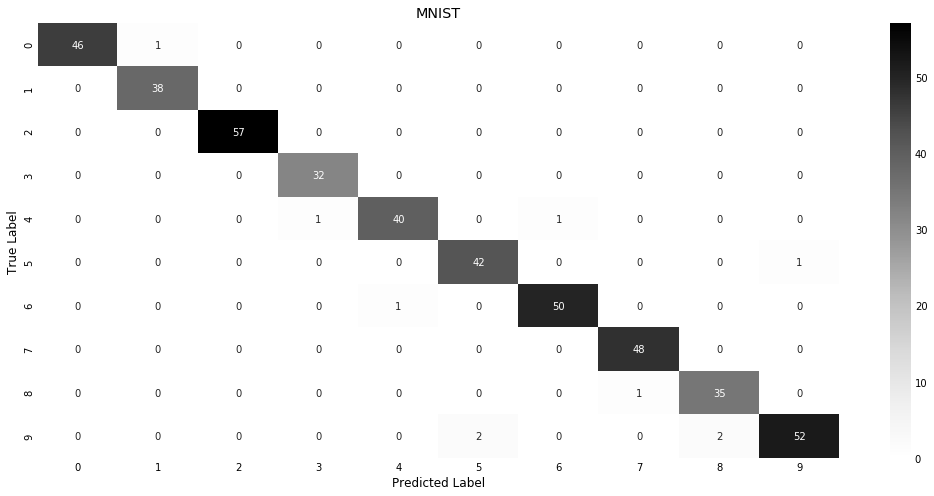

In [49]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1, 1, figsize=(16, 8))

cm = confusion_matrix(y_test, y_test_pred_int)
sns.heatmap(
    cm, cmap='Greys', 
    annot=True, 
    fmt="d",
    ax=ax
) 

ax.set_title('MNIST')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

fig.show()

## Digits PCA

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
pca = PCA(n_components=2)

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_2d = pca.fit_transform(x_train_scaled)
x_test_2d = pca.transform(x_test_scaled)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


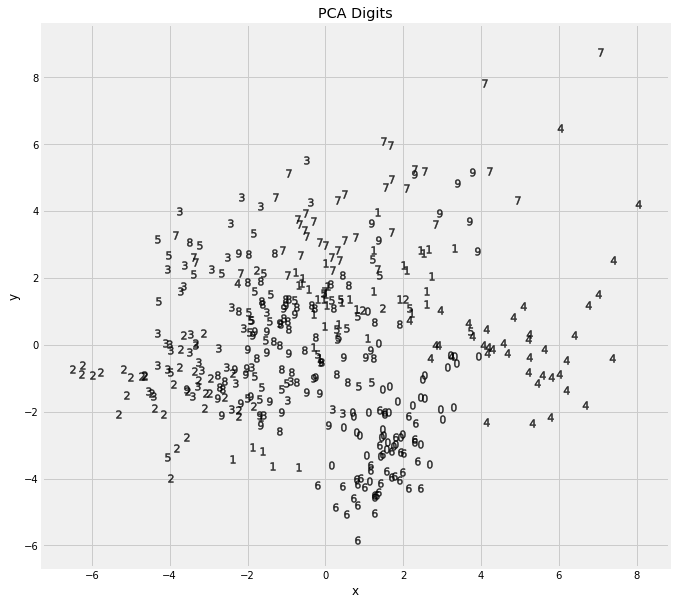

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for target in set(y_train):
    pd.DataFrame(
        x_train_2d[
            y_train == target
        ],
        columns=['x', 'y']
    ).sample(n=40).plot(
        kind='scatter',
        x='x',
        y='y',
        marker=f'${target}$',
        s=64,
        color='k',
        alpha='0.75',
        ax=ax,
    )
    
ax.set_title('PCA Digits')

fig.show()

In [52]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 16))

x_train_ipca = pca.inverse_transform(x_train_2d) 
x_test_ipca = pca.inverse_transform(x_test_2d) 

x_train_ipca = scaler.fit_transform(x_train_ipca)
x_test_ipca = scaler.fit_transform(x_test_ipca)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


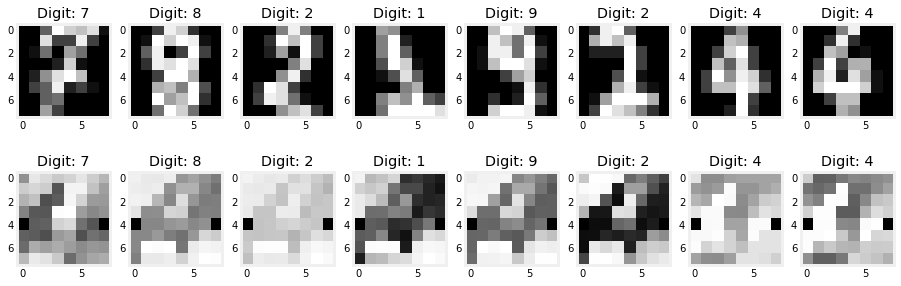

In [53]:
import random 

fig, axs = plt.subplots(2, 8, figsize=(14, 5))

for i in range(8):
    
    rand = random.choice(range(y_train.shape[0]))

    img_orig = x_train[rand]
    img_comp = x_train_ipca[rand]
    
    display_img(img_orig, y_train[rand], axs[0][i], vmin=None, vmax=None)
    display_img(img_comp, y_train[rand], axs[1][i], vmin=None, vmax=None)


fig.show()

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()

pca = PCA()

x_train_scaled = scaler.fit_transform(x_train)
pca.fit(x_train_scaled)

df_explained_variance_ratio = pd.DataFrame(
    [
        (component, explained_variance_ratio) 
        for component, explained_variance_ratio in enumerate(pca.explained_variance_ratio_, 1)
    ],
    columns=['component', 'explained_variance_ratio']
)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


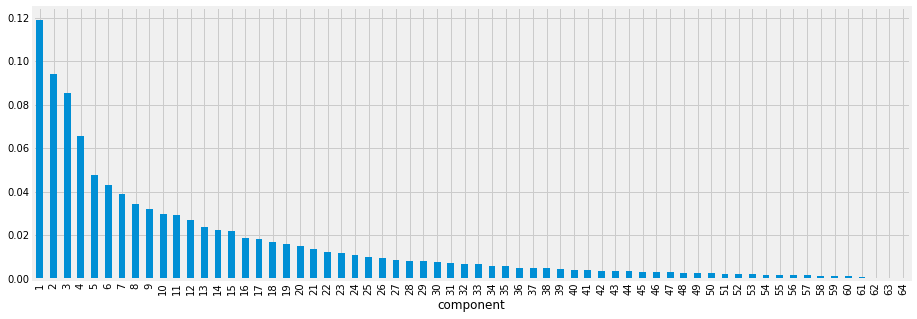

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(14, 5))

df_explained_variance_ratio.set_index('component')['explained_variance_ratio'].plot(
    kind='bar',
    ax=ax
)

fig.show()

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
pca = PCA(n_components=15)

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 16))

x_train_ipca = pca.inverse_transform(x_train_pca) 
x_test_ipca = pca.inverse_transform(x_test_pca) 

x_train_ipca = scaler.fit_transform(x_train_ipca)
x_test_ipca = scaler.fit_transform(x_test_ipca)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


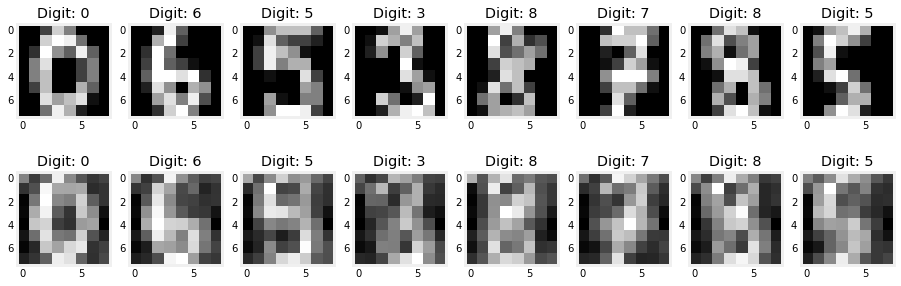

In [58]:
import random 

fig, axs = plt.subplots(2, 8, figsize=(14, 5))

for i in range(8):
    
    rand = random.choice(range(y_train.shape[0]))

    img_orig = x_train[rand]
    img_comp = x_train_ipca[rand]
    
    display_img(img_orig, y_train[rand], axs[0][i], vmin=None, vmax=None)
    display_img(img_comp, y_train[rand], axs[1][i], vmin=None, vmax=None)


fig.show()

In [59]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train_ipca, y_train)

y_train_pred = clf.predict(x_train_ipca)
y_test_pred = clf.predict(x_test_ipca)

In [60]:
from sklearn.metrics import accuracy_score

print(
    'Digits test accuracy score: {:.1%} [train score: {:.1%}]'.format(
        accuracy_score(y_test, y_test_pred),
        accuracy_score(y_train, y_train_pred)
    )
    
)

Digits test accuracy score: 96.9% [train score: 97.9%]


# NeighborhoodComponentsAnalysis

In [61]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis

nca = NeighborhoodComponentsAnalysis(n_components=2)

x_train_nca = nca.fit_transform(x_train, y_train)
x_test_nca = nca.transform(x_test)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


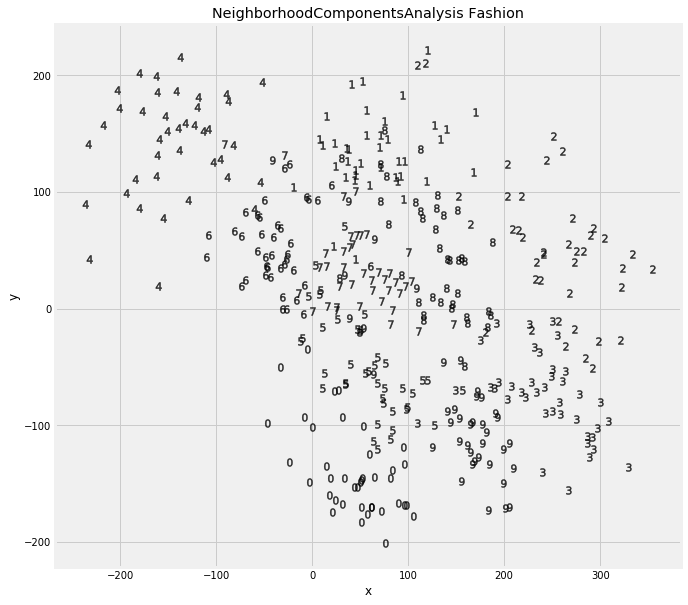

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for target in set(y_train):
    pd.DataFrame(
        x_train_nca[
            y_train == target
        ],
        columns=['x', 'y']
    ).sample(n=40).plot(
        kind='scatter',
        x='x',
        y='y',
        marker=f'${target}$',
        s=64,
        color='k',
        alpha='0.75',
        ax=ax,
    )
    
ax.set_title('NeighborhoodComponentsAnalysis Fashion')

fig.show()

In [63]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis

nca = NeighborhoodComponentsAnalysis(n_components=2)

x_train_nca = nca.fit_transform(x_train, y_train)
x_test_nca = nca.transform(x_test)

In [64]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3, weights='uniform')
clf.fit(x_train_nca, y_train)

y_train_pred = clf.predict(x_train_nca)
y_test_pred = clf.predict(x_test_nca)

from sklearn.metrics import accuracy_score

print(
    'Digits test accuracy score: {:.1%} [train score: {:.1%}]'.format(
        accuracy_score(y_test, y_test_pred),
        accuracy_score(y_train, y_train_pred)
    )
    
)

Digits test accuracy score: 76.2% [train score: 91.0%]


In [65]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5, weights='distance')
clf.fit(x_train_nca, y_train)

y_train_pred = clf.predict(x_train_nca)
y_test_pred = clf.predict(x_test_nca)

from sklearn.metrics import accuracy_score

print(
    'Digits test accuracy score: {:.1%} [train score: {:.1%}]'.format(
        accuracy_score(y_test, y_test_pred),
        accuracy_score(y_train, y_train_pred)
    )
    
)

Digits test accuracy score: 76.9% [train score: 100.0%]


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


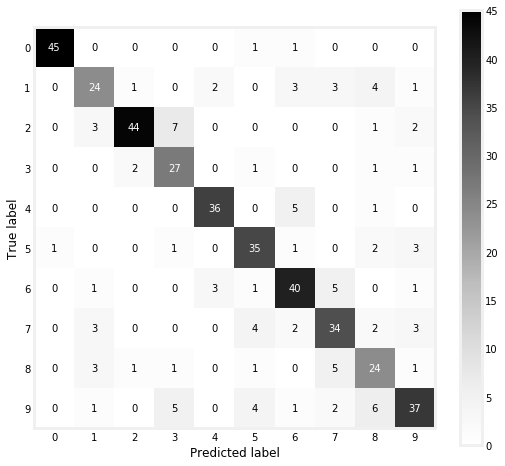

In [66]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

plot_confusion_matrix(clf, x_test_nca, y_test, cmap='Greys', ax=ax)
ax.grid(False)

fig.show()

In [67]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

scaler = MinMaxScaler()
clf = LogisticRegression(max_iter=1000)

x_train_scaled = scaler.fit_transform(x_train_nca)
x_test_scaled = scaler.transform(x_test_nca)

clf.fit(x_train_scaled, y_train)

y_train_pred = clf.predict(x_train_scaled)
y_test_pred = clf.predict(x_test_scaled)



from sklearn.metrics import accuracy_score

print(
    'Digits test accuracy score: {:.1%} [train score: {:.1%}]'.format(
        accuracy_score(y_test, y_test_pred),
        accuracy_score(y_train, y_train_pred)
    )
    
)

Digits test accuracy score: 65.6% [train score: 68.7%]


## Distances 

In [68]:
points = pd.DataFrame(
    [[1, 2], [4, 6]], columns=['x1', 'x2']
)

points

,x1,x2
0,1,2
1,4,6


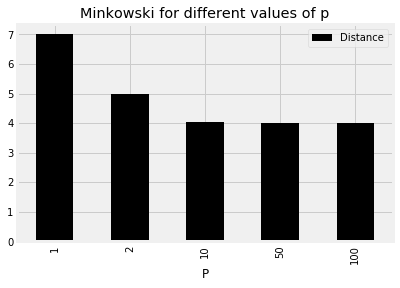

In [69]:
from sklearn.neighbors import DistanceMetric

d = [
    (p, DistanceMetric.get_metric('minkowski', p=p).pairwise(points)[0][-1])
    for p in [1, 2, 10, 50, 100]
]

pd.DataFrame(d, columns=['P', 'Distance']).set_index('P').plot(
    title='Minkowski for different values of p', kind='bar', color='k'
)

In [70]:
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances

manhattan_distances(points)[0][-1], euclidean_distances(points)[0][-1]

(7.0, 5.0)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


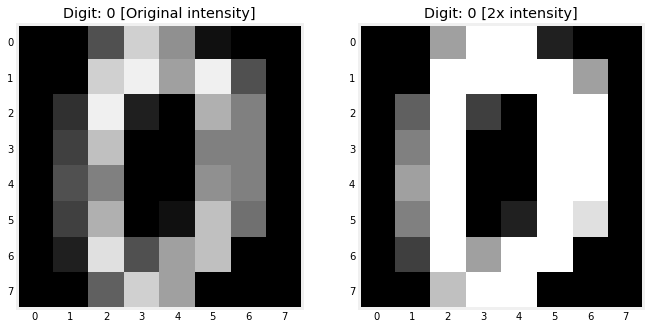

In [71]:
fig, axs = plt.subplots(1, 2, figsize=(10, 10))

display_img(1.0 * digits['data'][0],  f"{digits['target'][0]} [Original intensity]", axs[0])
display_img(2.0 * digits['data'][0],  f"{digits['target'][0]} [2x intensity]", axs[1])

fig.show()

In [72]:
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_distances

d0 = manhattan_distances(
    [1.0 * digits['data'][0], 2.0 * digits['data'][0]]
)[0,1]


d1 = euclidean_distances(
    [1.0 * digits['data'][0], 2.0 * digits['data'][0]]
)[0,1]

d2 = cosine_distances(
    [1.0 * digits['data'][0], 2.0 * digits['data'][0]]
)[0,1]

print(
    f'Manhattan Distances = {d0:.2f}, Euclidean Distances = {d1:.2f}, Cosine Distances {d2:.2f}'
)

Manhattan Distances = 294.00, Euclidean Distances = 55.41, Cosine Distances 0.00


In [73]:
from sklearn.metrics.pairwise import paired_distances

d0 = paired_distances([1.0 * digits['data'][0]], [2.0 * digits['data'][0]], metric='manhattan')[0]
d1 = paired_distances([1.0 * digits['data'][0]], [2.0 * digits['data'][0]], metric='euclidean')[0]
d2 = paired_distances([1.0 * digits['data'][0]], [2.0 * digits['data'][0]], metric='cosine')[0]

print(
    f'Manhattan Distances = {d0:.2f}, Euclidean Distances = {d1:.2f}, Cosine Distances {d2:.2f}'
)

Manhattan Distances = 294.00, Euclidean Distances = 55.41, Cosine Distances 0.00


## Pixel Selection

In [74]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(x_train, y_train)

Text(0.5, 1.0, 'Pixels kept when 75% removed')

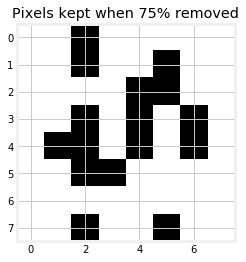

In [75]:
percent_to_remove = 75

mi_threshold = np.quantile(mi, 0.01 * percent_to_remove)

informative_pixels = (mi >= mi_threshold).reshape((8, 8))

plt.imshow(informative_pixels, cmap='Greys')
plt.title(f'Pixels kept when {percent_to_remove}% removed')

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


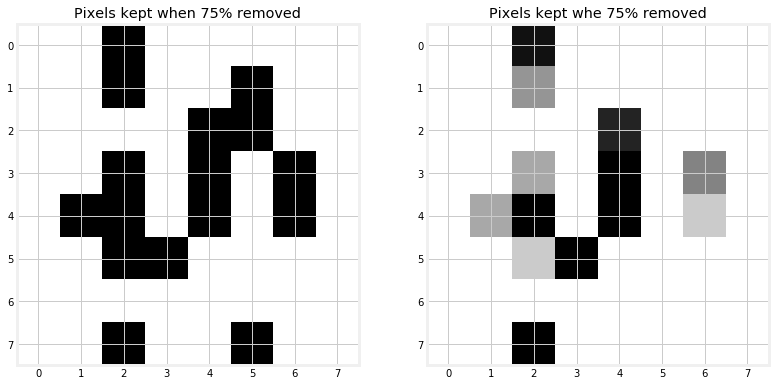

In [76]:
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

mi_threshold = np.quantile(mi, 0.01 * percent_to_remove)

zeros = np.zeros(8*8)

informative_pixels = (mi >= mi_threshold).reshape((8, 8))

axs[0].imshow(informative_pixels, cmap='Greys')
axs[0].set_title(f'Pixels kept when {percent_to_remove}% removed')

informative_image = np.copy(x_train[1]) 
informative_image[mi < mi_threshold] = 0
informative_image = informative_image.reshape((8, 8))

axs[1].imshow(informative_image, cmap='Greys')
axs[1].set_title(f'Pixels kept whe {percent_to_remove}% removed')
    
fig.show()    

In [77]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectPercentile

percent_to_keep = 100 - percent_to_remove
selector = SelectPercentile(mutual_info_classif, percentile=percent_to_keep)

x_train_mi = selector.fit_transform(x_train, y_train)
x_test_mi = selector.transform(x_test)

In [78]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5, metric='cosine', n_jobs=-1)

clf.fit(x_train_mi, y_train)

y_train_pred = clf.predict(x_train_mi)
y_test_pred = clf.predict(x_test_mi)


print(
    'Shift vs Pullover test accuracy score: {:.1%} [train accuracy score: {:.1%}]'.format(
        accuracy_score(y_test, y_test_pred),
        accuracy_score(y_train, y_train_pred),
    )
    
)

Shift vs Pullover test accuracy score: 94.7% [train accuracy score: 96.1%]
